<a href="https://colab.research.google.com/github/sohdacafe/Python_tips/blob/main/nlp_list_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [7]:
file_name = '/content/cry_baby.xlsx'
df = pd.read_excel(file_name)
df.head()

,歌詞,メロディー,番
0,胸ぐらを掴まれて 強烈なパンチを,Aメロ,1番
1,食らってよろけて 肩を並べうずくまった,Aメロ,1番
2,予報通りの雨に お前はにやけて,Aメロ,1番
3,「傷口が綺麗になる」なんて嘘をつく,Aメロ,1番
4,いつも口喧嘩さえ,Bメロ,1番


In [ ]:
'''
ファイルをコピーして使用、NaNの行は除いてdfとする
df = df_master.copy()
df = df.dropna(subset=["歌詞"])　歌詞の列に何も入っていない行を削除
'''

In [5]:
# MeCabをインストールを行う準備
!apt install aptitude 
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [6]:
import MeCab

In [14]:
m = MeCab.Tagger ('-Ochasen')
# m = MeCab.Tagger ('-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd') 新語を多く取り入れた辞書

In [19]:
def word_split(doc):
    node = m.parseToNode(doc)

    while node:
        print(node.feature)
        node = node.next

In [21]:
word_split('胸ぐらを掴まれて　強烈なパンチを強く')

BOS/EOS,*,*,*,*,*,*,*,*
名詞,一般,*,*,*,*,胸ぐら,ムナグラ,ムナグラ
助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
動詞,自立,*,*,五段・マ行,未然形,掴む,ツカマ,ツカマ
動詞,接尾,*,*,一段,連用形,れる,レ,レ
助詞,接続助詞,*,*,*,*,て,テ,テ
記号,空白,*,*,*,*,　,　,　
名詞,形容動詞語幹,*,*,*,*,強烈,キョウレツ,キョーレツ
助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
名詞,サ変接続,*,*,*,*,パンチ,パンチ,パンチ
助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,強い,ツヨク,ツヨク
BOS/EOS,*,*,*,*,*,*,*,*


In [22]:
# 名詞、動詞、形容詞を抽出する関数を作成
def word_splits(doc):
    node = m.parseToNode(doc)
    words=[]
    
    while node:
        hinshi = node.feature.split(',')[0]
        if (hinshi == '名詞') | (hinshi == '動詞') | (hinshi == '形容詞'):
            words.append(node.feature.split(',')[6])
        node = node.next
        
    return words

In [23]:
word_splits('胸ぐらを掴まれて　強烈なパンチを強く')

['胸ぐら', '掴む', 'れる', '強烈', 'パンチ', '強い']

In [26]:
# 歌詞に関数を適用させ、目的の品詞を抽出する
df["名詞"] = df['歌詞'].apply(word_splits) 
df.head()

,歌詞,メロディー,番,名詞
0,胸ぐらを掴まれて 強烈なパンチを,Aメロ,1番,"[胸ぐら, 掴む, れる, 強烈, パンチ]"
1,食らってよろけて 肩を並べうずくまった,Aメロ,1番,"[食らう, よろける, 肩, 並べる, うずくまる]"
2,予報通りの雨に お前はにやけて,Aメロ,1番,"[予報, 通り, 雨, お前, にやける]"
3,「傷口が綺麗になる」なんて嘘をつく,Aメロ,1番,"[傷口, 綺麗, なる, 嘘, つく]"
4,いつも口喧嘩さえ,Bメロ,1番,[口喧嘩]


In [28]:
df['名詞'].head()

0        [胸ぐら, 掴む, れる, 強烈, パンチ]
1    [食らう, よろける, 肩, 並べる, うずくまる]
2         [予報, 通り, 雨, お前, にやける]
3           [傷口, 綺麗, なる, 嘘, つく]
4                         [口喧嘩]
Name: 名詞, dtype: object

In [31]:
import itertools
import collections

In [32]:
# バラバラのリストを1つのリストに格納する(itertools.chain)
words = list(itertools.chain.from_iterable(df['名詞']))
c = collections.Counter(words)

In [34]:
# 範囲、カテゴリを絞って集計する場合
words_picked = df[df["番"]=="2番"]["名詞"]
words = list(itertools.chain.from_iterable(words_picked))
c = collections.Counter(words)

In [ ]:
c

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12427 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35328 missing from current font.
  font.set_

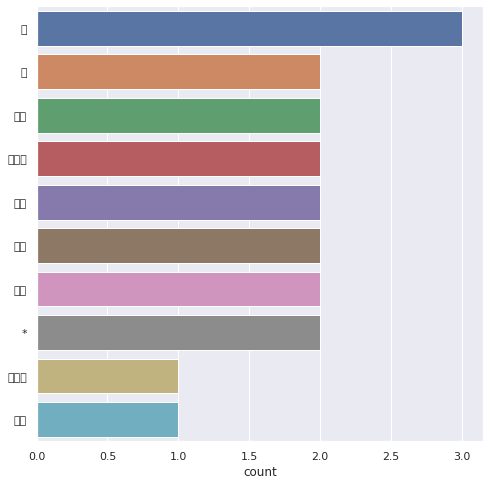

In [48]:
sns.set()
fig = plt.subplots(figsize=(8,8))
sns.countplot(y=words,order=[i[0] for i in c.most_common(10)])
# リスト内包表記、トップ10を表示

In [43]:
c.most_common(10)

[('何', 3),
 ('度', 2),
 ('れる', 2),
 ('忘れる', 2),
 ('言葉', 2),
 ('よう', 2),
 ('流す', 2),
 ('*', 2),
 ('胸ぐら', 1),
 ('掴む', 1)]

In [45]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['STIXGeneral', 'DejaVu Sans', 'STIXSizeFourSym', 'cmb10', 'DejaVu Sans', 'STIXSizeTwoSym', 'STIXGeneral', 'cmex10', 'DejaVu Serif', 'cmss10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmtt10', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmsy10', 'cmmi10', 'STIXNonUnicode', 'DejaVu Sans', 'STIXSizeFiveSym', 'cmr10', 'DejaVu Serif Display', 'STIXSizeOneSym', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Sans', 'Humor Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans', 'Liberation Mono', 'IPAexGothic']


In [47]:
# matplotlibの日本語化
! pip install japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline